<a href="https://colab.research.google.com/github/enthropie/DataScienceProjects/blob/master/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2%D0%B0_%D0%95%D0%BB%D0%B5%D0%BD%D0%B0_mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проанализируем входные данные, подгрузив исходный датасет.

In [173]:
import numpy as np
import pandas as pd
import re

data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx')

data.head()

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


При первичном анализе видно, что данные обладают рядом проблем, а именно:
- не по всем должностям есть примеры кандидатов с положительным вердиктом
- не по всем строкам заполнен целевой показатель
- отсуствуют значимые для приема кандидата данные (а именно сведения о его навыках и компетенциях)
- нет описания самой вакансии для понимания, а кого именно ищет компания на определенную должность.

По указанным выше причинам модель будет обладать невысоким качеством предсказания.

**Подготовка dataset-а**

Чтобы проверить гипотезу оставим для обученияданные только по одно из подбираемый должностей (HR-специалист), так как в этом подмножестве есть приемлемое кол-во записей обоих классов.

In [176]:
data = data.loc[data['Ищет работу на должность']== 'HR-специалист']

In [177]:
# проверим данные на наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 499
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       115 non-null    int64 
 1   Дата отклика                     115 non-null    object
 2   ФИО                              115 non-null    object
 3   Пол, возраст                     115 non-null    object
 4   ЗП                               115 non-null    object
 5   Ищет работу на должность         115 non-null    object
 6   Город                            115 non-null    object
 7   Занятость                        115 non-null    object
 8   График                           115 non-null    object
 9   Опыт ()                          115 non-null    object
 10  Последнее/нынешное место работы  115 non-null    object
 11  Последняя/нынешняя должность     115 non-null    object
 12  Образование и ВУЗ                115

In [60]:
# убираем строки, для которых не определен целевой параметр и / или имеются пропуска

data = data.dropna()

In [61]:
# убираем столбцы, не влияющие на качество обучения модели

features = data.drop(['Дата отклика', 'Обновление резюме','ФИО', 'Unnamed: 0'], axis=1).columns
data_clean = data[features]

In [62]:
# создадим функцию по извлечению возраста из колонки 'Пол, возраст'

def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year

# и функцию по извлечению возраста

def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return ""


# создадим две новые колонки для пола и возраста

data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)

# удалим ненужный столбец

data_clean.drop(['Пол, возраст'], axis=1, inplace=True)

<ipython-input-62-03754b84d740>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
<ipython-input-62-03754b84d740>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)
<ipython-input-62-03754b84d740>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [63]:
# создадим функцию по выделению уровня образования

def get_education_level(arg):
    education_key_words = ['неоконченноевысшее', 'среднееспециальное', 'среднее', 'высшее', 'бакалавр', 'магистр', 'кандидатнаук', 'докторнаук']
    arg = ''.join(arg.split(' ')[:3])
    for i in range(len(education_key_words)):
      if education_key_words[i] in arg.lower():
        return education_key_words[i]
    return ""

# создадим новый столбец для уровня образования и удалим старый столбец

data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)

data_clean['Образование'].value_counts()

<ipython-input-63-009cd5335830>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
<ipython-input-63-009cd5335830>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                49
среднееспециальное    38
среднее                9
бакалавр               8
неоконченноевысшее     7
магистр                4
Name: Образование, dtype: int64

In [64]:
# определим функцию для пересчета опыта работы в месяцы

def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']

    if pd.isnull(arg) or arg == 'Не указано':
        return 0

    arg = arg.replace("—", '')
    args_splited = arg.split(' ')[:6]
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)

# создадим новый столбец с опытом работы в месяцах
data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)

# для информации посчитаем медианый опыт работы (в месяцах)
print(data_clean['Опыт работы (месяц)'].median())

# удалим ненужный столбнц
data_clean.drop(['Опыт ()'], axis=1, inplace=True)

59.0


<ipython-input-64-b19a9978e2be>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)
<ipython-input-64-b19a9978e2be>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Опыт ()'], axis=1, inplace=True)


In [65]:
# кодируем бинарные категориальные признаки

# целевой признак 'Подходит - да/нет' преобразуем к категориальномусформату: да - 1 / нет - 0
data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


<ipython-input-65-c34c4accc3a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


In [66]:
# определим функции для выделения каждого типа занятости у кандидата

def is_full_employment(arg):
    if 'полная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_part_employment(arg):
    if 'частичная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_project(arg):
    if 'проектная работа' in arg.lower():
        return 1
    else:
        return 0

def is_volunteer(arg):
    if 'волонтёрство' in arg.lower() or 'волонтерство' in arg.lower():
        return 1
    else:
        return 0

def is_intern(arg):
    if 'стажировка' in arg.lower():
        return 1
    else:
        return 0

# опеделим функции для выделения предпочитаемого графика


def is_full_time(arg):
    if 'полный день' in arg.lower():
        return 1
    else:
        return 0

def is_shift_schedule(arg):
    if 'сменный график' in arg.lower():
        return 1
    else:
        return 0

def is_flexible_schedule(arg):
    if 'гибкий график' in arg.lower():
        return 1
    else:
        return 0

def is_remote_work(arg):
    if 'удалённая работа' in arg.lower() or 'удаленная работа' in arg.lower():
        return 1
    else:
        return 0

def is_shift_method(arg):
    if 'вахтовый метод' in arg.lower():
        return 1
    else:
        return 0

# для каждого из возможных типов занятости создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
data_clean['проектная работа'] = data_clean['Занятость'].apply(is_project)
data_clean['волонтёрство'] = data_clean['Занятость'].apply(is_volunteer)
data_clean['стажировка'] = data_clean['Занятость'].apply(is_intern)


# для каждого из возможных типов рабочего графика создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полный день'] = data_clean['График'].apply(is_full_time)
data_clean['сменный график'] = data_clean['График'].apply(is_shift_schedule)
data_clean['гибкий график'] = data_clean['График'].apply(is_flexible_schedule)
data_clean['удалённая работа'] = data_clean['График'].apply(is_remote_work)
data_clean['вахтовый метод'] = data_clean['График'].apply(is_shift_method)

# удалим старые столбцы
data_clean.drop(['Занятость'], axis=1, inplace=True)
data_clean.drop(['График'], axis=1, inplace=True)


<ipython-input-66-40c86895ba03>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
<ipython-input-66-40c86895ba03>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)


In [67]:
# создадим функцию для определения города соискателя

def get_city(arg):
    arg = str(arg).lstrip()
    city = arg.split(' ')[0]

    return city.replace(',','')

# создадим функцию для определения, готов ли соискатель к релокации
def get_ready_for_relocation(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')


    if len(arr) > 3:
        ready_for_relocation = arr[2].strip()
    else:
        ready_for_relocation = arr[1].strip()


    if 'не' in ready_for_relocation.lower():
        return 0
    else:
        return 1

# создадим функцию для определения, готов ли соискатель к командировке
def get_ready_for_businessTrips(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')

    ready_for_businessTrips = arr[-1].strip()


    if 'не' in ready_for_businessTrips.lower():
        return 0
    else:
        return 1


# выделим данные о готовности соискателя к командировкам и переезду в отдельные столбцы
data_clean['Готовность к переезду'] = data_clean['Город'].apply(get_ready_for_relocation)
data_clean['Готовность к командировкам'] = data_clean['Город'].apply(get_ready_for_businessTrips)

# переопределим значение столбца "город"
# городом соискателя
data_clean['Город'] = data_clean['Город'].apply(get_city)


In [68]:
# просмотрим текущее состояние таблицы

data_clean.head()

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Подходит - да/нет,Пол,Возраст,Образование,Опыт работы (месяц),...,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
0,30 000 руб.,HR-специалист,Уфа,Tiqum,Контент-менеджер,1,0,24,среднееспециальное,60,...,0,0,0,1,0,0,0,0,0,0
1,40 000 руб.,HR-специалист,Уфа,МБОУ СОШ,Учитель русского языка и литературы,1,0,31,магистр,123,...,0,0,0,1,0,0,0,0,0,0
2,не указана,HR-специалист,Уфа,"Газпромбанк, ОАО",Специалист,1,0,28,среднееспециальное,52,...,0,0,0,1,0,0,0,0,0,0
3,не указана,HR-специалист,Уфа,нет,нет,0,0,24,среднее,0,...,0,0,0,1,0,0,0,0,0,0
4,35 000 руб.,HR-специалист,Уфа,Восток,Упаковщик,0,1,0,неоконченноевысшее,41,...,0,0,0,1,1,1,0,0,1,1


In [69]:
# перекодируем все категориальные признаки в столбцы со значениями 0 / 1 (One Hot Encoding)
data_clean = pd.get_dummies(data_clean)

In [70]:
# убедимся, что все столбцы теперь содержат чиловые данные
data_clean.head()

,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,...,Последняя/нынешняя должность_Хостес (администратор зала),Последняя/нынешняя должность_Электромонтёр,Последняя/нынешняя должность_нет,"Последняя/нынешняя должность_филиал ПАО АНК «Башнефть» «Башнефть-Новойл""",Образование_бакалавр,Образование_высшее,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное
0,1,0,24,60,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,31,123,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,28,52,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,24,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,41,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [74]:
# оценим, насколько сбалансирован датасет

print(data_clean['Подходит - да/нет'].value_counts())




0    111
1     32
Name: Подходит - да/нет, dtype: int64


Датасет сильно не сбалансирован: множество кандидатов с веридиктом "да" в 27 раз меньше, чем количество тех, кому отказали.

In [72]:
# выделим из датасетв подмножество успешных кандидатов
extra = data_clean.loc[data_clean['Подходит - да/нет']==1]

In [73]:
# Добавим к данным несколько повторов подмножества с вердиктом "да" для лучшей сбалансированности категорий в датасете

for i in range(7):
    data_clean  = pd.concat([data_clean , extra], ignore_index=True)


In [75]:
# Добавим библиотеки для создания модели нейронной сети и оценки ее качества
import tensorflow as tf

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt

In [154]:
# Выделим целевой показатель в отдельное множество и удалим его из множества входных параметров
features = data_clean.drop('Подходит - да/нет', axis=1).columns
X, y = data_clean[features], data_clean['Подходит - да/нет']


In [155]:
# Выделим обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (85, 231) (85,)
Test: (58, 231) (58,)


**Создание модели**

In [156]:
# Создадим последовательную модель из 3 полносвязный слоев (80 - 20 - 1 нейрон)
model = Sequential()


model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Скомпилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# и выведем ее аржитектуру
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 80)                18560     
                                                                 
 dense_30 (Dense)            (None, 20)                1620      
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 20,201
Trainable params: 20,201
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Провердем обучение нейронной сети
history = model.fit(X_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=150,            # Количество эпох обучения
          validation_split=0.4,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/150
7/7 [==============================] - 1s 26ms/step - loss: 0.3221 - accuracy: 0.5686 - val_loss: 0.1803 - val_accuracy: 0.8235
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.7451 - val_loss: 0.1853 - val_accuracy: 0.8235
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.7843 - val_loss: 0.2061 - val_accuracy: 0.7941
Epoch 4/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1980 - accuracy: 0.8039 - val_loss: 0.2333 - val_accuracy: 0.7059
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.1904 - accuracy: 0.8039 - val_loss: 0.2502 - val_accuracy: 0.6765
Epoch 6/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.8039 - val_loss: 0.2581 - val_accuracy: 0.6176
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.8235 - val_loss: 0.2466 - val_accuracy: 0.6176
Epoch 8/150
7/7 [=========

In [158]:
# Выведем финальные метрики точности для тестовой выборки

scores = model.evaluate(X_test,
                        y_test,
                        verbose=1
                        )

2/2 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.8621


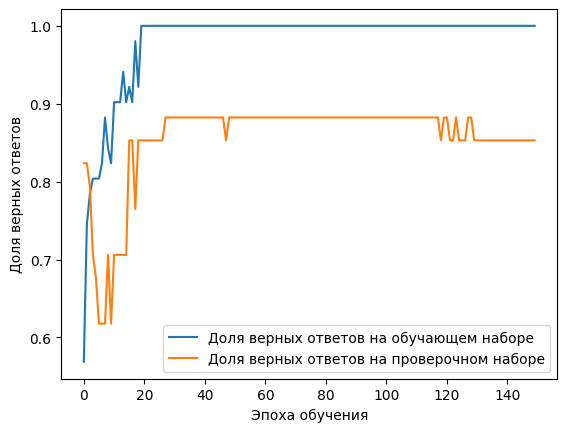

In [159]:
# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

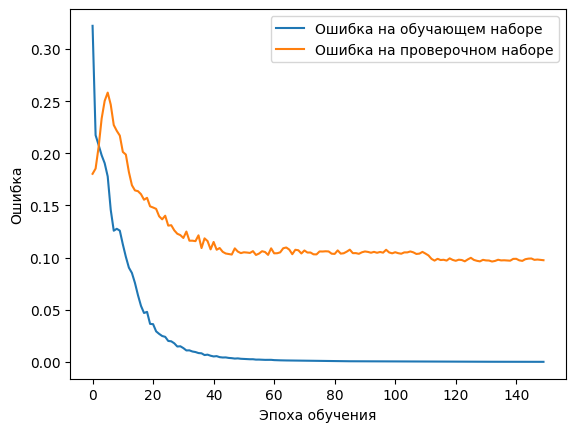

In [160]:
# Построим график изменения ошибки в ходе обучения

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [161]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict(X_train)

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


Метрики для тренировочной выборки:
Accuracy: 0.94
Precision: 0.79
Recall: 1.00
F1 score: 0.88
Метрики для тестовой выборки:
Accuracy: 0.86
Precision: 0.62
Recall: 1.00
F1 score: 0.76


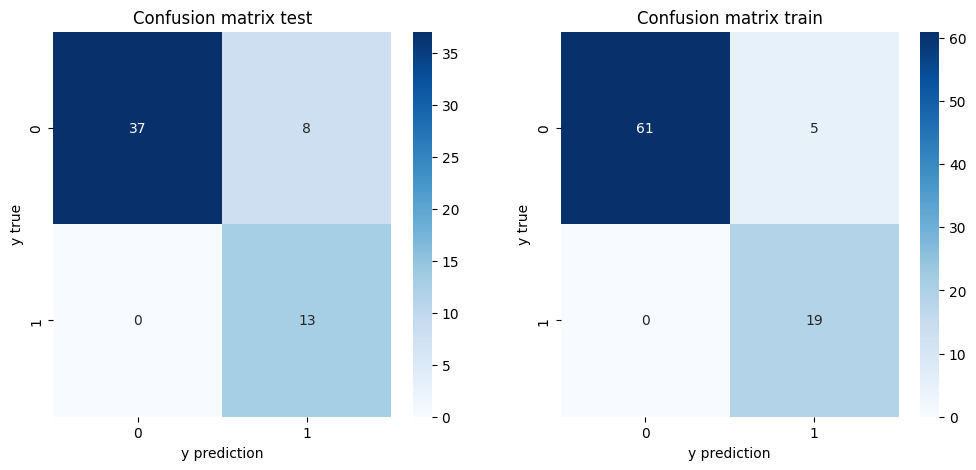

In [162]:
# Посчитаем метрики качества модели на основе получившихся предсказанных моделей


# Вычислим и выведем в графическом виде confusion matrix (матрицу ошибок)
from sklearn import metrics
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())
confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix test')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion matrix train')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))





In [164]:
# Дополним датасет столбцом '% подходит / % нет'

# для начала запишем в отдельный dataframe тестовую выборку

result_csv_predict  = pd.DataFrame(X_test)


In [167]:
#  дополним столбцом с реальным вердиктом по соискателю

result_csv_predict['true_value'] = pd.to_numeric(y_test, downcast="float")

In [168]:
# создадим функцию для расчета процента соответствия / несоответствия кандидата

def calc_conclusion(arg):
  return '{:.2f}'.format(arg * 100) + ' / ' + '{:.2f}'.format(100 - arg * 100)


In [169]:
# выведем расчитанные знаечния в новый столбец

result_csv_predict['% подходит / % нет'] = y_predict_test
result_csv_predict['% подходит / % нет'] = result_csv_predict['% подходит / % нет'].apply(calc_conclusion)

In [170]:
# выведем результаты

result_csv_predict.head(58)

,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,...,Последняя/нынешняя должность_нет,"Последняя/нынешняя должность_филиал ПАО АНК «Башнефть» «Башнефть-Новойл""",Образование_бакалавр,Образование_высшее,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное,true_value,% подходит / % нет
138,0,21,10,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1.0,98.72 / 1.28
1,0,31,123,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.0,97.67 / 2.33
61,0,29,97,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,10.98 / 89.02
62,0,25,51,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0.0,3.15 / 96.85
17,0,25,70,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.0,17.24 / 82.76
136,0,31,123,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.0,97.67 / 2.33
54,0,22,48,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.0,27.36 / 72.64
51,0,24,40,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0.0,0.02 / 99.98
141,0,28,52,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1.0,97.42 / 2.58
44,0,0,42,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0.0,0.02 / 99.98
